# Introduction
Here I will be looking at the census income data available at https://archive.ics.uci.edu/ml/datasets/Census+Income with the aim of predicting whether a person earns more than 50k or less than. I retrieved the data from Kaggle at https://www.kaggle.com/uciml/adult-census-income where it was already in a csv file with the correct column headers.

**Reference**: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

## Procedure
I will follow the following procedure to achieve the task of predicting whether salary is less than or greater than 50k:
1. Dataset description
2. Data Wrangling
3. Exploratory Data analysis
4. Multiple model development
    - Logistic Regression
    - Stochastic Gradient Descent
    - Decision Trees 
    - Random Forests
    - KNN
5. Model Evaluation and Refinement
6. Conclusion.

## Dataset Description
- age: The age of the person
- workclass: The working class eg self-employed, private, government-employed etc
- fnlwgt: The final weight. 'The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian noninstitutional population of the US' (Kaggle, https://www.kaggle.com/uciml/adult-census-income)
- education: Level of education eg Bachelors, doctorate etc.
- education-num: Number of years of education
- marital-status: Whether married or single or divorced etc.
- occupation: Type of work at eg. Tech-support, Craft-repair etc.
- relationship: The relationship to the people in the household eg wife, only-child, unmarried.
- race: The race of the person eg White, Other, Black etc.
- sex: Whether male or female
- capital-gain: The amount of capital gained
- capital-loss: The amount of capital lost
- hours-per-week: How many hours worked per week
- native-country: The original country/ home country

### Load the necessary libraries 

In [1]:
#import the necessary modules/libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
#%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

### Load the data

In [2]:
df_census = pd.read_csv('adult.csv')
df_census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Data Wrangling

In [3]:
#get summary statistics of the whole dataset
df_census.describe(include='all')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [4]:
#check the column data types to ensure they are correct
df_census.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

All data types are correct so proceed to check for missing values 

In [5]:
#missing values
df_census.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

The results above imply that there are no missing values. However, by looking at the first 5 rows, we can see there row entries with question marks. There, replace these question marks with "NaN" and then check how many rows have missing values.

In [6]:
#replace question marks with NaN
df_census = df_census.replace({'?':np.nan})
df_census

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [7]:
df_census.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Since the number of rows that have missing values are not that many compared to the size of the dataset we drop the missing values. Additionally, since they are categorical variables, there is no median value we can replace them with and using the frequency may bias the results.

In [8]:
#drop null values and assign to a new datafram
df_census1 = df_census.dropna()
df_census1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [9]:
#reset the index so as to have the correct index after dropping null values
df_census1.reset_index(drop=True, inplace=True)
df_census1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [10]:
#rename the all columns with . so that they are callable
df_census1.rename(columns={'marital.status':'marital_status', 'education.num':'education_num',
                           'capital.gain':'capital_gain', 'hours.per.week':'hours_per_week',
                           'capital.loss':'capital_loss', 'native.country':'native_country'
                          }, inplace = True)

df_census1.head()

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


We need to format the column we intend to predict to binary 0 and 1 where 0 represents $\leq 50$k and 1 represents $>50$k

In [11]:
#use label encoding to code the data
#create a new dataframe copy of containing all categorical features
census_categ = df_census1.select_dtypes(include=['object']).copy()

#convert the income column to category
census_categ["income"] = census_categ["income"].astype('category')
census_categ.dtypes

workclass           object
education           object
marital_status      object
occupation          object
relationship        object
race                object
sex                 object
native_country      object
income            category
dtype: object

In [12]:
#assign encoded variable to the income column
census_categ["income"] = census_categ["income"].cat.codes
census_categ.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,0
1,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,0
2,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,0
3,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,0
4,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,0


In [13]:
#rename the income column to add it to the original dataset
census_categ.rename(columns={"income":"binary_income"}, inplace=True)
census_categ.head()

#convert the column from int8 to int64
census_categ["binary_income"] = census_categ["binary_income"].astype('int64')

In [14]:
#insert the formatted dataframe into the working dataframe
df_census1 = pd.concat([df_census1, census_categ['binary_income']], axis = 1)
df_census1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,binary_income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,0
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,0


In [15]:
#drop the income columns in both dataframes
df_census1.drop(['income'] , axis=1, inplace=True)
census_categ.drop(['binary_income'] , axis=1, inplace=True)

In [16]:
census_categ.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States
1,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States
2,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States
3,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States
4,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States


In [17]:
#creat a new dataframe containing only numerical variables
census_numer = df_census1.select_dtypes(include=['int64']).copy()
census_numer.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,binary_income
0,82,132870,9,0,4356,18,0
1,54,140359,4,0,3900,40,0
2,41,264663,10,0,3900,40,0
3,34,216864,9,0,3770,45,0
4,38,150601,6,0,3770,40,0


## Exploratory Data Analysis
### Numerical data
Explore the relationship between the numerical data and the target variable<br>
It is important to understand the distribution of the people's earning that is what percentage of the dataset earns more than 50k and what percentage earns less. This will help us identify class imbalance to understand the impact it may have on the models.

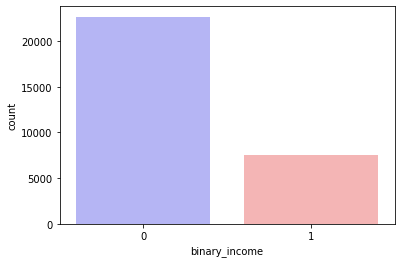

In [18]:
#show the distribution of those above 50k vs those equal to or less than
sns.countplot(x="binary_income", data=df_census1, palette="bwr")
plt.show()

In [19]:
#calculate the percentage of these people 
total_income = len(df_census1['binary_income'])
inc_less50k = len(df_census1[df_census1.binary_income == 0])
inc_great50k = len(df_census1[df_census1.binary_income == 1])

perc_inc_less50k = round(((inc_less50k/total_income) *100), 2)
perc_inc_great50k= round(((inc_great50k/total_income) *100), 2)
print("Percentage of people earning less than or equal to $50k:", perc_inc_less50k)
print("Percentage of people earning greater than $50k:", perc_inc_great50k)

Percentage of people earning less than or equal to $50k: 75.11
Percentage of people earning greater than $50k: 24.89


**Correlation matrix for numerical data**<br>
Plot a correlation matrix to see how the numerical variables are correlated with one another

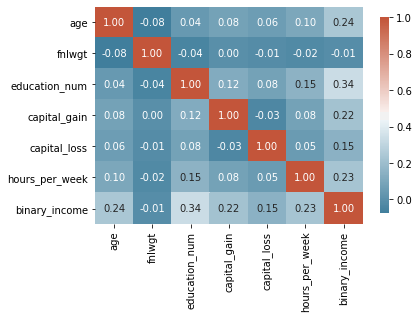

In [20]:
# Correlation matrix between numerical values
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(census_numer.corr(),annot=True, fmt = ".2f", cmap=cmap, cbar_kws={"shrink": .9}, linecolor='w')
plt.show()

The income seems to be most correlated with number of education years but even the pearson's r is very low. It is also correlated positively with age, capital gain, hours per week, and capital loss in that order. It is inversely correlated with final weight but the correlation is very small.

**Scatter Plots for all numerical variables**<br>
The scatter shows how the variables are related with each other in relation to the income. 

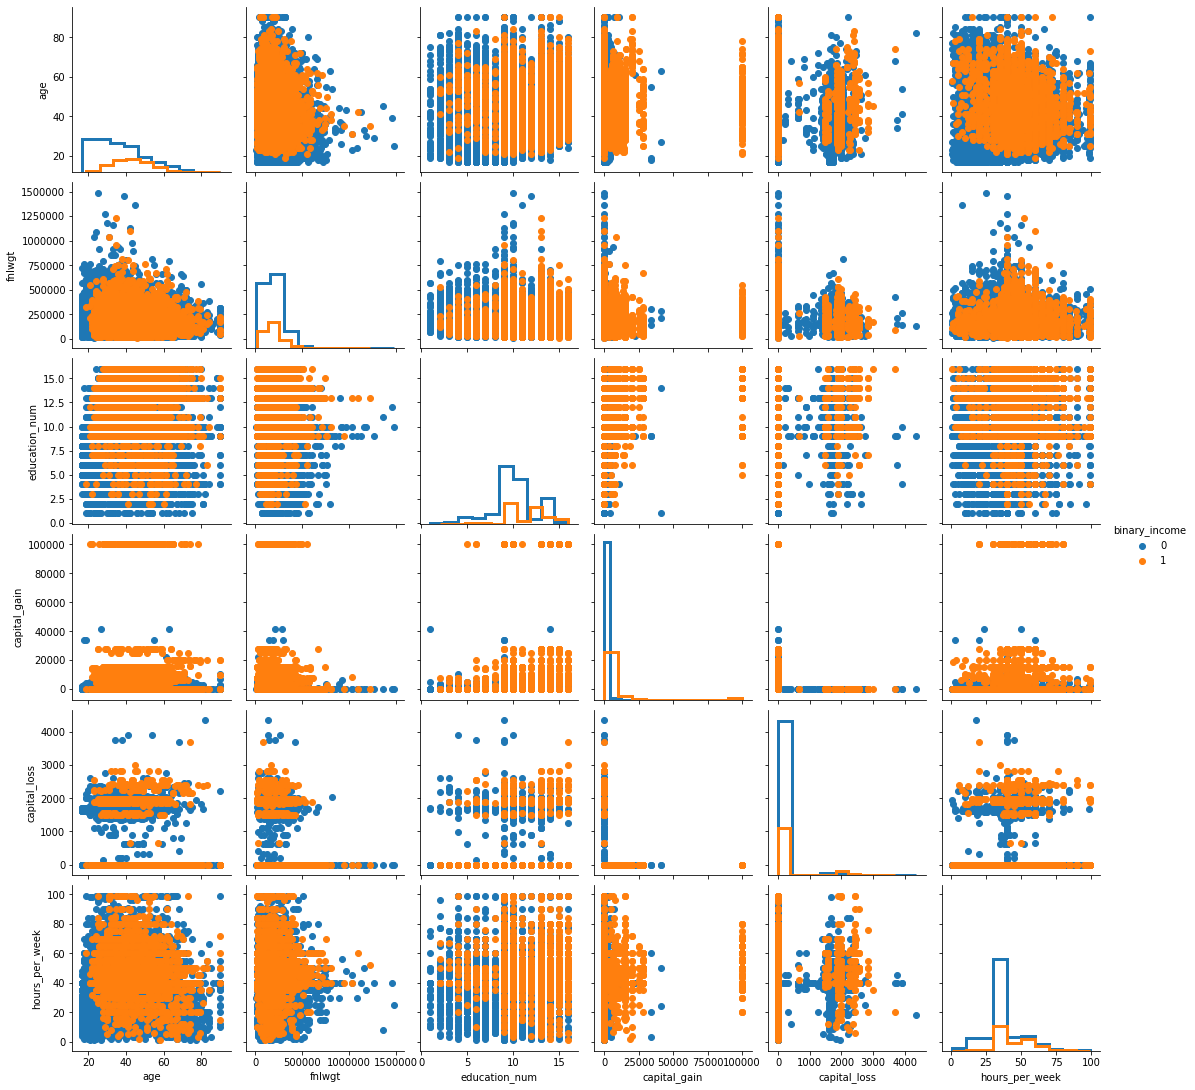

In [21]:

g = sns.PairGrid(census_numer, hue='binary_income')
g = g.map_diag(plt.hist,histtype='step', linewidth=3)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

The blue markers indicate the people who earn less than 50k while the orange markers indicate the people who earn more than 50k. It is clear that a simple linear regression cannot be used to make predictions and that this is a classification problems. 

### Categorical data
We want to see the Percentage distribution of the categorical variables in relation to the income

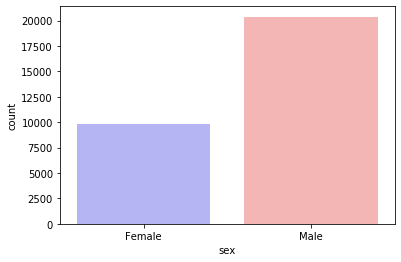

In [22]:
sns.countplot(x="sex", data=df_census1, palette="bwr")
plt.show()

In [23]:
#calculate the percentage of these people 
total_sex = len(df_census1['sex'])
male = len(df_census1[df_census1.sex == "Male"])
female = len(df_census1[df_census1.sex == "Female"])

perc_male = round(((male/total_sex) *100), 2)
perc_female = round(((female/total_sex) *100), 2)
print("Percentage of males people:", perc_male )
print("Percentage of females:", perc_female)

Percentage of males people: 67.57
Percentage of females: 32.43


The dataset contains 2/3 males and 1/3 females

In [24]:
def perc_cross_tabplot(data, col1, col2):
    '''Function that takes two columns of a given dataframe, creates a cross-tabulation showing the frequency as 
    a percentage of the second column by the first column
    Args:
        dataframe (data): the dataframe containing the columns
        string (col1): pandas array as string to show frequency
        string (col2): pandas array as string to group the frequency
    Returns:
        figure: a figure showing the col2 percentage by col1
    '''
    pd.crosstab(data[col1], data[col2], normalize='index').plot(kind="bar",
                                                                        figsize=(15,6),color=['red','blue'])
    plt.title('Income Percentage by ' + str(col1))
    plt.xlabel(str(col1))
    plt.xticks(rotation=90)
    plt.legend(["Less than 50k", "More than 50k"])
    plt.ylabel('Percentage')
    plt.show()

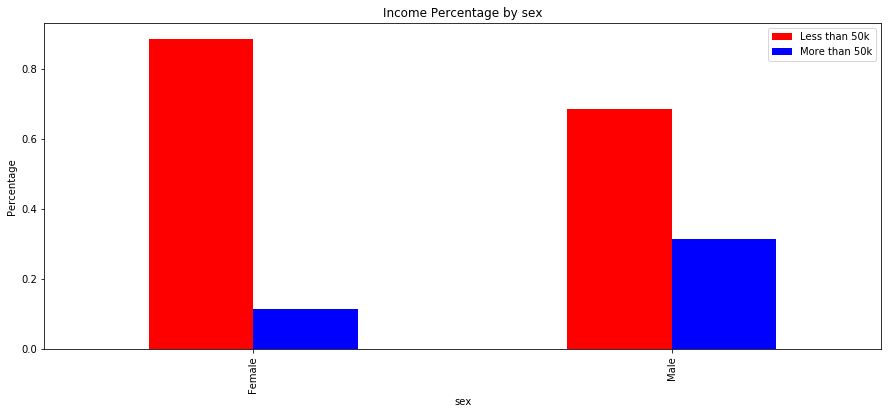

In [25]:
#create a Percentage table for the sex in relation to income and plot the results
perc_cross_tabplot(df_census1, 'sex', 'binary_income')

This shows that there are more females than men who earn less than 50k and more males than females who earn more than 50k and overall, there are more people who earn less than 50k. The proportions for the sex are varying which indicates that country may be an important predictor. 

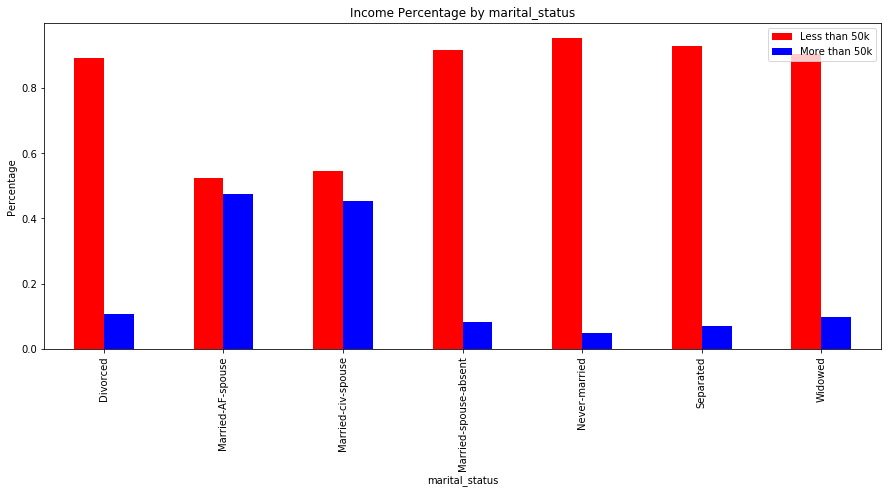

In [26]:
#create a Percentage table for the marital status in relation to income and plot the results
perc_cross_tabplot(df_census1, 'marital_status', 'binary_income')

This shows that more people who were married with the spouse present earned more than 50k. The other categories (divorced, married-spouse-absetn, never-married, separated, widowed) can be termed as single and most of these people earned less than 50k. Overall the proportions for the rmarital status are varying which indicates that country may be an important predictor. 

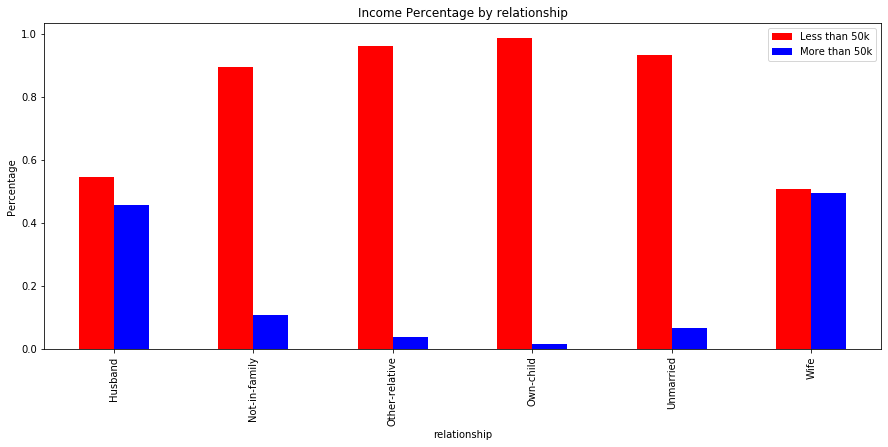

In [27]:
#create a percentage table for the relationships in relation to income and plot the results
perc_cross_tabplot(df_census1, 'relationship', 'binary_income')

This result shows that there are more husbands and wives in a household who earn more than 50k while there are more people from other categories who earn less than 50k. Overall the proportions for the relationship are varying which indicates that country may be an important predictor. 

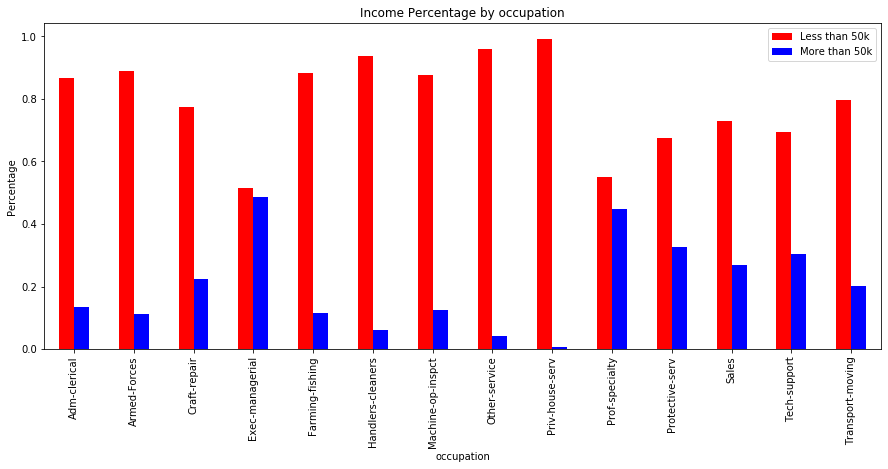

In [28]:
#create a Percentage table for the occupation in relation to income and plot the results
perc_cross_tabplot(df_census1, 'occupation', 'binary_income')

This shows that Executive-managerial and prof-speciality have the highest proportions of people earning more than 50k while Other-service, Private-house-service and handlers-cleaners have the highest proportions of people earning less than 50k. Overall the proportion for the occupation is varying which indicates that country may be an important predictor. 

In [29]:
census_categ.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States
1,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States
2,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States
3,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States
4,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States


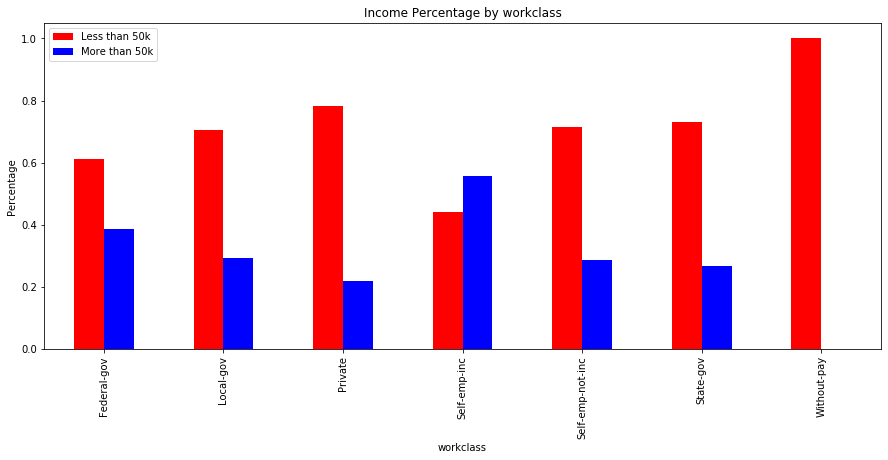

In [30]:
#create a Percentage table for the working class in relation to income and plot the results
perc_cross_tabplot(df_census1, 'workclass', 'binary_income')

This shows that self-employed people have the highest proportion of people earnign more than 50k while those without pay will obviously fall below 50k and thus have the highest proportion for less than 50k. Overall the proportion for the working class is varying which indicates that country may be an important predictor. 

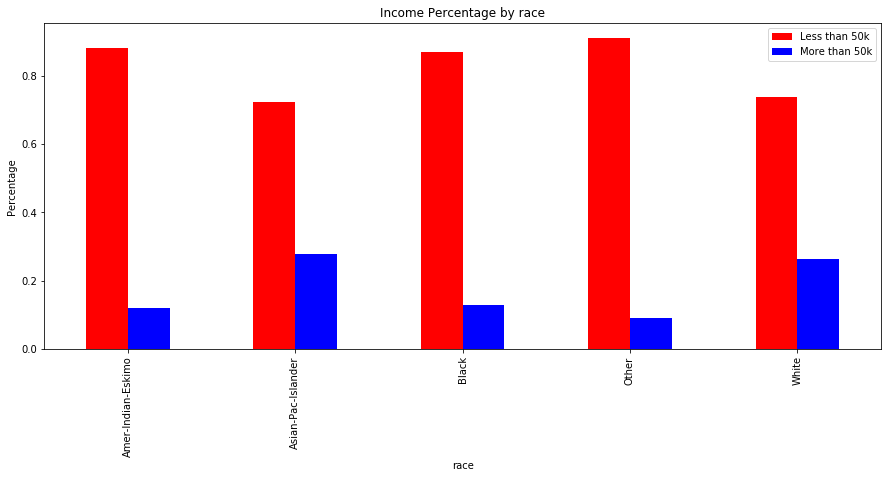

In [31]:
#create a Percentage table for the race in relation to income and plot the results
perc_cross_tabplot(df_census1, 'race', 'binary_income')

This shows that Asian-Pacific-islander race has the highest proportion of people earning more than 50k and other has the highest proportion of people who earn less than 50k. Overall there is not much difference in the proportions of people earning more than 50k which indicates race may not be an important predictor.  

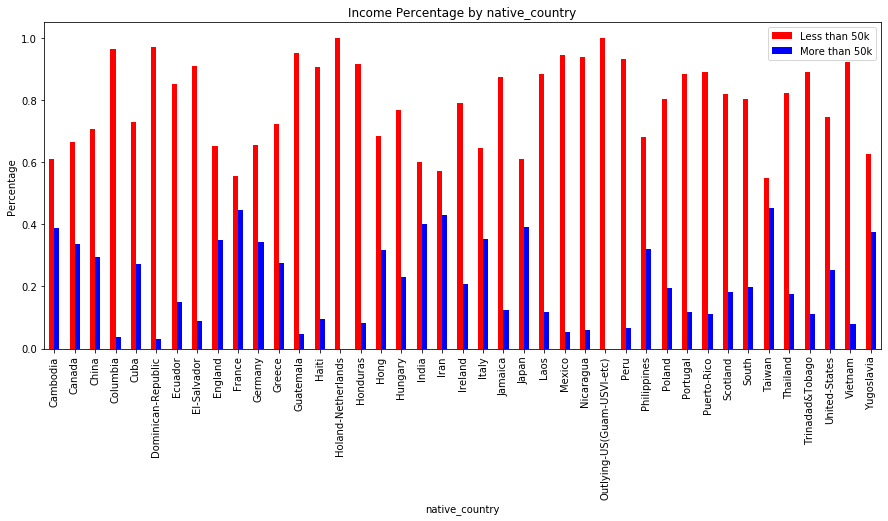

In [32]:
#create a Percentage table for the native countruy in relation to income and plot the results
perc_cross_tabplot(df_census1, 'native_country', 'binary_income')

The proportion per country is varying which indicates that country is an influenctial predictor. 

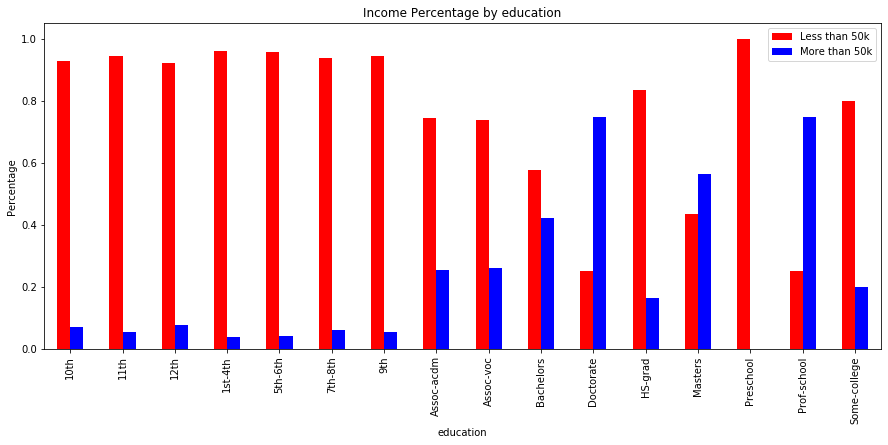

In [33]:
#create a Percentage table for the education in relation to income and plot the results
perc_cross_tabplot(df_census1, 'education', 'binary_income')

This shows that those who have a doctorate and prof-school have the highest proportion of people who earn more than 50k while those who went just upto 12th grade (1st - 12th) have the highest proportions of people who earn less than 50k

## Model Development
Here, I will build several models and then evaluate the models using confusion matrix.<br>
Before building the models, it is important to convert all categorical variables to numeric without them being ordinal that is there should be no hierarchy within a column. For example, there is no good reason why doctorate should be assigned 1 and 12th 4 etc. Therefore, I use Onehot encoding which ensures that each variable is treated equally.

### Feature Scaling
Here, I convert the categorical variables into numeric using onehot encoding as stated above. I use feature scaling to standardize the continuous variables. In this case, standardization feature scaling is applied where the mean is removed and then divides the variables by the standard deviations so that we have unit variance.

In [34]:
#import the necessary modules/libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [35]:
#create new dataframe containing the numerical variables but without the target column 
census_numer1 = census_numer.drop(['binary_income'], axis = 1)

#create new dataframe containing the all columns except the target column
predictors = df_census1.drop(['binary_income'], axis = 1)

#create new array containing just the target column
target = df_census1['binary_income']
census_numer1.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,82,132870,9,0,4356,18
1,54,140359,4,0,3900,40
2,41,264663,10,0,3900,40
3,34,216864,9,0,3770,45
4,38,150601,6,0,3770,40


In [36]:
# X = df_census1.drop(['binary_income'], axis = 1)
# y = df_census1['binary_income']
# census_features = list(X.select_dtypes(include=['int64']))
# categorical_features = list(X.select_dtypes(include=['object']))

#### Pipelines
Pipelines are very useful in simplifying steps to transforming data. They help in sequentially performing multiple transformations on given datasets. Here, I use pipelines to standardize the continuous variables and then to simultaneously encode the categorical variables and merge this into one sparse matrix. The matrix is then converted to a pandas dataframe to be used in training models.

In [37]:
#standardize the numerical data
numer_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('std_scaler', StandardScaler()),
])

In [40]:
#convert the categorical and continuous dataframes into lists for use in pipelines.
numer_attribs = list(census_numer1)
categ_attribs = list(census_categ)

#standardize the continuous variable while simultaneously encoding the categorical variable
full_pipe = ColumnTransformer([
    ("num", numer_pipe, numer_attribs),
    ("cat", OneHotEncoder(), categ_attribs),
])
census_predictors = full_pipe.fit_transform(predictors).toarray()
census_predictors = pd.DataFrame(census_predictors)
census_predictors.head()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,3.316630,-0.538790,-0.439738,-0.147445,10.555814,-1.914161,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.184831,-0.467906,-2.400559,-0.147445,9.427915,-0.077734,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.195067,0.708645,-0.047574,-0.147445,9.427915,-0.077734,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.337883,0.256222,-0.439738,-0.147445,9.106365,0.339636,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.033340,-0.370964,-1.616231,-0.147445,9.106365,-0.077734,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [41]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: binary_income, dtype: int64

Split the data into training and testing data with the testing size being 30%

In [42]:
X_train, X_test, y_train, y_test = train_test_split(census_predictors, target, test_size = 0.3, random_state = 0)

### Logistic Regression.
I start with logistic regression with all the features and calculate the accuracy score.

In [43]:
#create a logistic regression model, fit the data, obtain a prediction and calculate the accuracy score
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)
y_pred_lor = logreg.predict(X_test)

print('Accuracy score for logistic regression: {0:0.4f}'. format(100*accuracy_score(y_test, y_pred_lor)))

Accuracy score for logistic regression: 84.8160


### Stochastic Gradient Descent

In [45]:
#create an SDG classifier, fit the data, obtain a prediction and calculate the accuracy score
sgd_class = SGDClassifier(random_state=42)
sgd_class.fit(X_train, y_train)
y_pred_sgd = sgd_class.predict(X_test)

print('Accuracy score for SDG classifier: {0:0.4f}'.format(100*accuracy_score(y_test, y_pred_sgd)))

Accuracy score for SDG classifier: 83.9319


### Decision Trees

In [46]:
#create a decision tree classifier, fit the data, obtain a prediction and calculate the accuracy score
tree_class = DecisionTreeClassifier()
tree_class.fit(X_train, y_train)
y_pred_dtc = tree_class.predict(X_test)

print('Accuracy score for decision tree classifier: {0:0.4f}'.format(100*accuracy_score(y_test, y_pred_dtc)))

Accuracy score for decision tree classifier: 81.1250


### Random Forests

In [47]:
#create a random forest classifier, fit the data, obtain a prediction and calculate the accuracy score
random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
print("Accuracy score for random forest classifier: {0:0.4f}" .format(100*accuracy_score(y_test, y_pred_rf)))


Accuracy score for random forest classifier: 84.7386


### KNN Neighbours

In [48]:
#create a knn neighbours classifier, fit the data, obtain a prediction and calculate the accuracy score
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("Accuracy score for knn neighbours classifier: {0:0.4f}" .format(100*accuracy_score(y_test, y_pred_knn)))

Accuracy score for knn neighbours classifier: 83.3904


In [49]:
# finding the best value of k
scores = []
for k in range(1,25):
    knn1 = KNeighborsClassifier(n_neighbors = k)  
    knn1.fit(X_train, y_train)
    #scores.append(knn1.score(X_test, y_test))
    y_pred_knn = knn1.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred_knn))
print(scores.index(max(scores)), max(scores))

16 0.836777544480053


In [50]:
print("Highest accuracy score for knn neighbours classifier: {0:0.4f}" .format(100*max(scores)))

Highest accuracy score for knn neighbours classifier: 83.6778


## Model Evaluation and Refinement
The accuracy scores attained by the models are quite with logistic regression performing best. I go on to see if I can improve the accuracy score using cross-validation whose aim is to select the model that best represents the real world. Cross-validation splits the data into k folds and then trains the model with k-1 folds and tests with the remaining 1 fold. This process is repeated until all folds have been used as testing/validation set which in turn reduces the testing error and overfitting.

In [51]:
kfold = KFold(n_splits=10, shuffle=False)
print('KFold CrossValScore for logistic regression %s' % cross_val_score(logreg, X_train, y_train, cv=kfold).mean())

KFold CrossValScore for logistic regression 0.8484815289321448


In [52]:
kfold = KFold(n_splits=10, shuffle=False)
print('KFold CrossValScore for SDG classifier %s' % cross_val_score(sgd_class, X_train, y_train, cv=kfold).mean())

KFold CrossValScore for SDG classifier 0.8423240053902358


In [53]:
kfold = KFold(n_splits=10, shuffle=False)
print('KFold CrossValScore for decision tree %s' % cross_val_score(tree_class, X_train, y_train, cv=kfold).mean())

KFold CrossValScore for decision tree 0.8070854282402424


In [54]:
kfold = KFold(n_splits=10, shuffle=False)
print('KFold CrossValScore for random forest %s' % cross_val_score(random_forest, X_train, y_train, cv=kfold).mean())

KFold CrossValScore for random forest 0.8481497530970529


In [55]:
kfold = KFold(n_splits=10, shuffle=False)
print('KFold CrossValScore for knn neighbours %s' % cross_val_score(knn, X_train, y_train, cv=kfold).mean())

KFold CrossValScore for knn neighbours 0.8371145281569843


From the cross-validation results, the simple logistic regression has the highest accuracy and may be enough to predict whether a person earns more than or less than 50k. 
### Confusion Matrix
A confusion matrix shows how well the model performed in classifying the variables in their correct category.

In [56]:
cmat_lor = confusion_matrix(y_test,y_pred_lor)
cmat_sgd = confusion_matrix(y_test,y_pred_sgd)
cmat_dtc = confusion_matrix(y_test,y_pred_dtc)
cmat_rf = confusion_matrix(y_test,y_pred_rf)
cmat_knn = confusion_matrix(y_test, y_pred_knn)

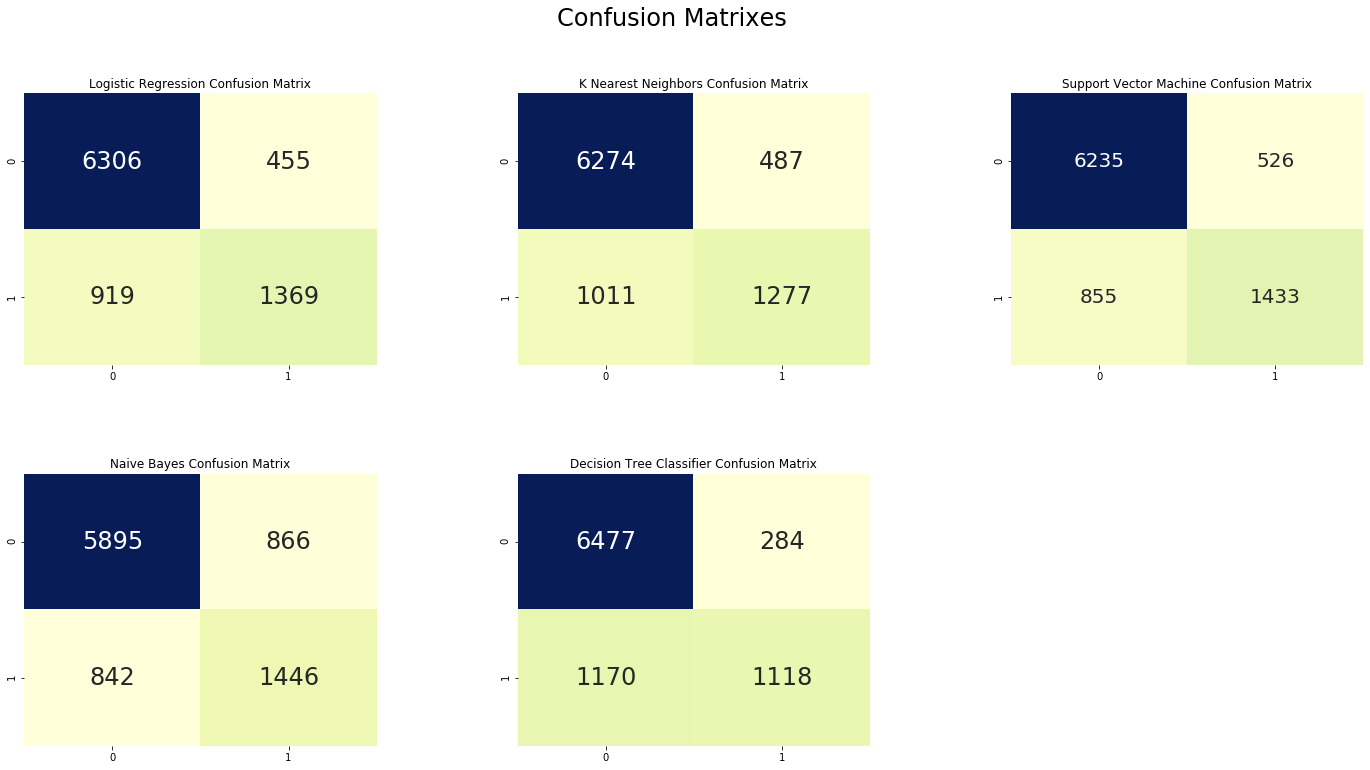

In [57]:
#fig, axes = plt.subplots(2, 3,figsize=(20,10))
#sns.boxplot (x = 'waterfront', y = 'price', data = df_house, ax=axes[0, 0])

plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cmat_lor,annot=True,cmap="YlGnBu",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cmat_rf,annot=True,cmap="YlGnBu",fmt="d",cbar=False, annot_kws={"size": 20})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cmat_dtc,annot=True,cmap="YlGnBu",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cmat_sgd,annot=True,cmap="YlGnBu",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cmat_knn,annot=True,cmap="YlGnBu",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()